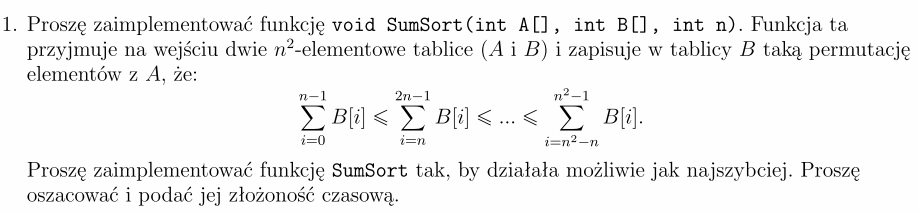

### Opis algorytmu

##### Wstępne przemyślenia

Wystarczy zauważyć, że tak naprawdę nie chcemy sortować tablicy $ A $. Naszym celem jest jedynie umieszczenie liczb w taki sposób, by sumy wszystkich liczb z kolejnych przedziałów o indeksach: $ [0, n-1], [n, 2n-1], [2n, 3n-1], ..., [n^2-n, n^2-1] $ spełniały dany w poleceniu warunek. Na myśl przychodzi od razu znalezienie liczb, które będą znajdowały się na krańcach przedziałów i utworzenie wiaderek oraz powrzucanie do nich odpowiednich wartości. Nie jest to jednak najlepszy sposób, ponieważ złożoność wyszukiwania liczby, jaka się znajdzie pod danym indeksem, przy pomocy wyszukiwania o złożoności liniowej (najszybsze możliwe dla nieposortowanej tablicy) wyniesie tu $ O(n^2) $, bo tablica ma $ n^2 $ elementów i do tego, musimy wyznaczyć krańce (przynajmniej początek/koniec, bo drugi punkt będziemy mieli dany jako odpowiednio koniec/początek kolejnego przedziału) przedziałów, a jest aż $ n $ przedziałów, więc wywołanie Linear Selecta musielibyśmy zrobić $ n $ razy, a to daje sumaryczną złożoność $ O(n^3) $ tylko na wyszukanie krańców przedziałów. Potem trzeba by przejść znów $ n $ razy przez tablicę (bo mamy $ n $ krańców przedziałów) i umieścić odpowiednie wartości w odpowiednim przedziale (wiaderku), a to znów daje złożoność $ O(n^3) $. Alternatywnie można przechodzić liniowo przez tablicę $ A $ (złożoność $ O(n^2) $) i dla każdej wartości wyszukiwać Binary Searchem indeksu przedziału (wiaderka), do którego ma trafić, poprzez znalezienie indeksu dolnego/górnego ograniczenia przedziału w tablicy $ n $-elementowej, którą wyznaczyliśmy wcześniej (z tymi krańcami przedziałów). To by nam dało złożoność $ O(n^2 \cdot log(n)) $, ale wciąż mamy sumarycznie $ O(n^3) $. Zatem ten sposób odpada.

##### Właściwe podejście

Problem da się rozwiązać łatwiej niż by to się mogło wydawać. Mianowicie, wystarczy przejść liniowo przez tablicę $ A $ (w czasie $ O(n^2) $ - nic lepszego nie da się osiągnąć, bo również taką złożoność będzie miało wpisywanie wartości do tablicy $ B $) i liczyć sumę kolejnych $ n $ wartości, znajdujących się na indeksach z przedziałów: $ [0, n-1], [n, 2n-1], [2n, 3n-1], ..., [n^2-n, n^2-1] $. Nie musimy brać konkretnie zawsze $ n $ pozostałych najmniejszych wartości, możemy wziąć dowolne wartości do przedziału $ n $-elementowego, a następnie posortować te $ n $ przedziałów według sum elementów w tych przedziałach w czasie np. $ O(n \cdot log(n)) $, przy pomocy algorytmu Quick Sort (nie ma co kombinować z innym sortowaniem). Konieczne jest jeszcze rozeznanie, jakie wartości trafiły do danego przedziału o wyznaczonej dla niego sumie. Aby niepotrzebnie nie tworzyć nowej tablicy, możemy te sumy zapisać tymczasowo np. na początku tablicy $ B $ (na początkowych $ n $ spośród $ n^2 $ indeksów) w postaci par (krotek lub tablic 2-elementowych), składających się z wyznaczonej sumy oraz indeksu początku/końca przedziału wartości, jakie wliczają się do tej sumy (wystarczy trzymać tylko początek lub koniec, bo wiemy, że każdy przedział ma dokładnie $ n $ wartości). Ostatnim krokiem jest liniowe przejście po $ n $ parach (które wcześniej posortowaliśmy) w tablicy $ B $ (jeżeli umieściliśmy je na początku, to zaczynamy od ostatniej wartości, tak, aby nie nadpisać pozostałych par; jeżeli na końcu, zaczynamy od pierwszej z nich) i przepisanie odpowiedniego zbioru $ n $ wartości, które tworzyły tę sumę, z tablicy $ A $ do tablicy $ B $.

### Implementacja algorytmu

In [9]:
def SumSort(A, B, n):
    # Create tuples of (<values_sum>, <end_idx>) pairs where values_sum
    # is a sum of values within a range which ends on end_idx and begins
    # on end_idx - n + 1 index
    idx_B = 0
    values_sum = 0
    for i in range(len(A)):
        # Add a value to the sum
        values_sum += A[i]
        # Finish calculating a sum of elements within a range if we already
        # added n elements to this range
        if not (i + 1) % n:
            B[idx_B] = (values_sum, i)
            values_sum = 0
            idx_B += 1
            
    # Sort sums in B array in a non-decreasing order by a sum value
    quick_sort(B, 0, idx_B - 1, key=lambda tup: tup[0])
    
    # Rewrite numbers from A array to B array in a proper order
    idx = len(B) - 1
    for i in range(idx_B - 1, -1, -1):
        _, end_A_idx = B[i]
        for i in range(end_A_idx, end_A_idx - n, -1):
            B[idx] = A[i]
            idx -= 1
            

def quick_sort(arr, begin_idx, end_idx, *, key=lambda x: x):
    _quick_sort(arr, begin_idx, end_idx, key)
    

def _quick_sort(arr, left_idx, right_idx, key):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx, key)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position, key)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx, key)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx, key):
    pivot = key(arr[left_idx])
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while key(arr[i]) < pivot: i += 1
            
        j -= 1
        while key(arr[j]) > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

Kilka testów

In [22]:
import random

def test(n, range_, ints_only=False):
    if ints_only:
        A = [random.randint(*range_) for _ in range(n ** 2)]
    else:
        min_val = range_[0]
        range_size = range_[1] - range_[0]
        A = [round(random.random() * range_size + min_val, 2) for _ in range(n ** 2)]
    B = [None] * n ** 2

    print('n value:', n, end='\n\n')
    print('A input:')
    print(A)
    print('\nB input:')
    print(B)

    SumSort(A, B, n)

    print('\n\nA after:')
    print(A)
    print('\nB after:')
    print(B)

    print('\n\n===== Checking if correct: =====')
    sums = [sum(B[i:i+n]) for i in range(0, len(A), n)]
    print('Is correct?', sums == sorted(sums))

In [68]:
test(10, (-100, 100))

n value: 10

A input:
[48.26, 9.23, -84.02, 48.52, 24.3, -98.93, -28.39, 20.3, 32.84, 20.83, -33.94, 77.28, 50.78, 25.36, 52.33, 19.28, 72.77, -10.03, -66.14, 28.92, 49.62, -76.13, 60.91, 19.53, -45.52, 65.53, -78.58, -10.35, -56.7, -43.6, 74.03, 3.34, 96.85, -85.11, 70.2, 21.64, 86.45, -43.9, 60.09, 94.59, -65.42, 19.85, 42.09, -23.4, 14.24, 97.82, 60.86, -98.65, -24.18, 32.79, 3.37, -53.79, -99.04, 36.11, -23.24, 60.99, 59.2, 99.32, -62.9, 98.61, -85.22, -7.57, -82.8, -75.07, -82.78, 81.15, -35.24, 77.6, 4.98, -76.54, 78.84, -68.99, 33.11, -90.74, 25.19, 31.54, -12.89, 51.59, -22.55, 93.64, 52.31, -15.21, -57.47, 75.34, -30.6, -87.03, -21.68, 45.11, -1.03, 63.82, -76.65, 22.27, -12.64, 10.98, 7.94, -84.25, 50.89, -43.83, 79.33, -66.01]

B input:
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N